In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "high_z"
key = "z"
quantile = "2"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

12it [00:00, 113.62it/s]

25it [00:00, 117.04it/s]

39it [00:00, 120.87it/s]

52it [00:00, 122.04it/s]

65it [00:00, 123.78it/s]

79it [00:00, 125.99it/s]

92it [00:00, 127.04it/s]

104it [00:00, 112.94it/s]

115it [00:00, 102.61it/s]

128it [00:01, 108.44it/s]

139it [00:01, 105.83it/s]

153it [00:01, 113.15it/s]

167it [00:01, 119.36it/s]

182it [00:01, 124.93it/s]

196it [00:01, 128.40it/s]

210it [00:01, 131.15it/s]

225it [00:01, 134.26it/s]

239it [00:01, 135.14it/s]

253it [00:02, 134.69it/s]

267it [00:02, 136.23it/s]

282it [00:02, 137.40it/s]

296it [00:02, 137.13it/s]

310it [00:02, 132.26it/s]

324it [00:02, 134.27it/s]

338it [00:02, 135.60it/s]

352it [00:02, 136.65it/s]

366it [00:02, 133.13it/s]

380it [00:02, 131.96it/s]

394it [00:03, 131.71it/s]

408it [00:03, 118.86it/s]

421it [00:03, 120.24it/s]

435it [00:03, 125.30it/s]

449it [00:03, 128.93it/s]

464it [00:03, 132.20it/s]

478it [00:03, 133.87it/s]

492it [00:03, 133.83it/s]

506it [00:04, 111.66it/s]

519it [00:04, 115.87it/s]

534it [00:04, 122.37it/s]

549it [00:04, 127.44it/s]

563it [00:04, 113.00it/s]

577it [00:04, 118.76it/s]

590it [00:04, 120.85it/s]

604it [00:04, 125.83it/s]

618it [00:04, 129.43it/s]

633it [00:05, 132.82it/s]

647it [00:05, 130.28it/s]

661it [00:05, 126.27it/s]

674it [00:05, 125.89it/s]

688it [00:05, 129.54it/s]

703it [00:05, 132.57it/s]

717it [00:05, 132.73it/s]

732it [00:05, 135.28it/s]

746it [00:05, 116.40it/s]

759it [00:06, 118.19it/s]

772it [00:06, 120.18it/s]

786it [00:06, 124.78it/s]

800it [00:06, 128.23it/s]

815it [00:06, 131.71it/s]

829it [00:06, 133.43it/s]

843it [00:06, 135.24it/s]

857it [00:06, 135.37it/s]

871it [00:06, 117.87it/s]

884it [00:07, 117.81it/s]

897it [00:07, 119.55it/s]

910it [00:07, 120.96it/s]

923it [00:07, 121.66it/s]

936it [00:07, 122.60it/s]

949it [00:07, 117.06it/s]

963it [00:07, 122.76it/s]

977it [00:07, 127.04it/s]

991it [00:07, 129.51it/s]

1005it [00:07, 131.54it/s]

1019it [00:08, 120.13it/s]

1032it [00:08, 111.68it/s]

1046it [00:08, 118.48it/s]

1060it [00:08, 123.36it/s]

1074it [00:08, 127.58it/s]

1088it [00:08, 130.59it/s]

1102it [00:08, 133.23it/s]

1117it [00:08, 135.13it/s]

1131it [00:08, 136.45it/s]

1145it [00:09, 121.30it/s]

1160it [00:09, 126.38it/s]

1174it [00:09, 129.80it/s]

1188it [00:09, 131.83it/s]

1202it [00:09, 130.10it/s]

1216it [00:09, 121.95it/s]

1229it [00:09, 123.06it/s]

1244it [00:09, 128.09it/s]

1256it [00:09, 126.23it/s]


0it [00:00, ?it/s]

9it [00:00, 88.68it/s]

Number of empty sat catalogs is 0


18it [00:00, 88.96it/s]

30it [00:00, 95.24it/s]

45it [00:00, 106.20it/s]

60it [00:00, 115.52it/s]

75it [00:00, 120.71it/s]

87it [00:00, 119.86it/s]

102it [00:00, 125.78it/s]

115it [00:00, 124.06it/s]

129it [00:01, 127.30it/s]

142it [00:01, 116.11it/s]

157it [00:01, 123.49it/s]

170it [00:01, 123.88it/s]

185it [00:01, 129.94it/s]

200it [00:01, 134.44it/s]

215it [00:01, 138.03it/s]

230it [00:01, 140.41it/s]

245it [00:01, 141.82it/s]

260it [00:02, 142.59it/s]

275it [00:02, 143.92it/s]

290it [00:02, 144.07it/s]

305it [00:02, 144.64it/s]

320it [00:02, 122.36it/s]

333it [00:02, 110.13it/s]

347it [00:02, 115.68it/s]

361it [00:02, 120.32it/s]

375it [00:02, 123.22it/s]

389it [00:03, 126.25it/s]

403it [00:03, 129.32it/s]

418it [00:03, 132.92it/s]

432it [00:03, 134.93it/s]

447it [00:03, 138.37it/s]

461it [00:03, 138.53it/s]

476it [00:03, 140.64it/s]

491it [00:03, 142.37it/s]

506it [00:03, 143.58it/s]

521it [00:03, 143.70it/s]

536it [00:04, 137.57it/s]

550it [00:04, 135.18it/s]

565it [00:04, 138.26it/s]

580it [00:04, 140.35it/s]

595it [00:04, 142.98it/s]

610it [00:04, 143.81it/s]

625it [00:04, 144.35it/s]

640it [00:04, 145.16it/s]

655it [00:04, 145.29it/s]

670it [00:05, 144.79it/s]

685it [00:05, 144.56it/s]

700it [00:05, 139.17it/s]

714it [00:05, 139.03it/s]

729it [00:05, 141.22it/s]

744it [00:05, 142.47it/s]

759it [00:05, 117.87it/s]

772it [00:05, 110.35it/s]

784it [00:05, 105.31it/s]

796it [00:06, 108.27it/s]

810it [00:06, 114.32it/s]

824it [00:06, 118.92it/s]

837it [00:06, 120.39it/s]

851it [00:06, 123.89it/s]

864it [00:06, 124.57it/s]

877it [00:06, 124.57it/s]

890it [00:06, 121.88it/s]

903it [00:06, 118.41it/s]

918it [00:07, 124.77it/s]

933it [00:07, 129.71it/s]

948it [00:07, 133.29it/s]

963it [00:07, 135.65it/s]

978it [00:07, 137.36it/s]

993it [00:07, 139.10it/s]

1007it [00:07, 127.00it/s]

1021it [00:07, 128.57it/s]

1035it [00:07, 129.42it/s]

1049it [00:08, 131.96it/s]

1063it [00:08, 131.21it/s]

1077it [00:08, 131.59it/s]

1091it [00:08, 132.11it/s]

1105it [00:08, 132.66it/s]

1119it [00:08, 131.19it/s]

1133it [00:08, 116.28it/s]

1146it [00:08, 118.13it/s]

1161it [00:08, 125.81it/s]

1176it [00:09, 130.38it/s]

1190it [00:09, 117.51it/s]

1203it [00:09, 108.62it/s]

1217it [00:09, 114.54it/s]

1229it [00:09, 97.65it/s] 

1243it [00:09, 106.05it/s]

1256it [00:09, 128.45it/s]

Number of empty sat catalogs is 0


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

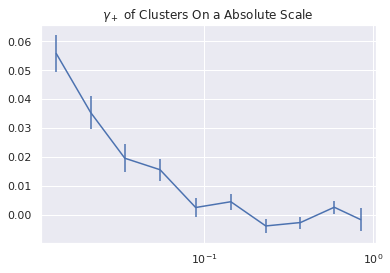

Aggregated xi:
[-14.1195 -15.8994 -14.4029 -19.3333  -4.8707 -14.144   16.9147  15.4304
 -15.2059   2.549 ]
------------------------------------------------------------------------------
Aggregated meanlogr:
[-1092.7088 -1725.5132 -2484.2781 -3588.7128 -4571.5981 -5990.1088
 -6499.4125 -5816.5394 -2999.9217  -264.183 ]
------------------------------------------------------------------------------
Aggregated npairs:
[ 253.  448.  734. 1236. 1891. 3091. 4448. 5890. 5694. 1584.]
------------------------------------------------------------------------------
Mean xi:
[-0.0558 -0.0355 -0.0196 -0.0156 -0.0026 -0.0046  0.0038  0.0026 -0.0027
  0.0016]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.319  -3.8516 -3.3846 -2.9035 -2.4176 -1.9379 -1.4612 -0.9875 -0.5269
 -0.1668]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

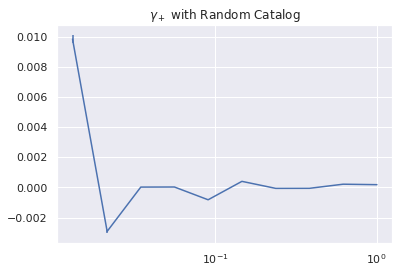

[ 9.8275e-03 -2.9159e-03  1.9740e-05  2.5301e-05 -8.2103e-04  3.9983e-04
 -6.5348e-05 -6.1656e-05  2.1127e-04  1.8010e-04]
[-2.7730e-04  8.2276e-05 -5.5699e-07 -7.1392e-07  2.3167e-05 -1.1282e-05
  1.8439e-06  1.7397e-06 -5.9613e-06 -5.0818e-06]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

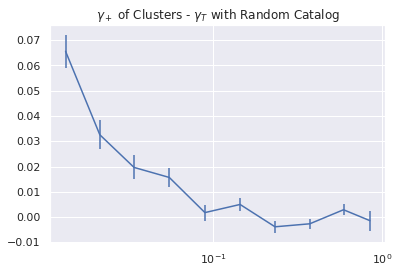

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

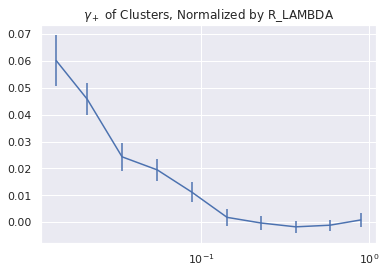

Aggregated xi:
[ -7.3795 -15.7939 -14.1548 -18.9056 -16.786   -4.5122   0.9387   8.6942
   6.5985  -3.7477]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -528.0768 -1337.9845 -1973.0235 -2821.8581 -3641.385  -4734.9208
 -5458.665  -5249.3027 -3328.4564  -469.4516]
------------------------------------------------------------------------------
Aggregated npairs:
[ 123.  346.  582.  971. 1498. 2432. 3696. 5233. 6213. 4206.]
------------------------------------------------------------------------------
Mean xi:
[-0.06   -0.0456 -0.0243 -0.0195 -0.0112 -0.0019  0.0003  0.0017  0.0011
 -0.0009]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.2933 -3.867  -3.3901 -2.9061 -2.4308 -1.9469 -1.4769 -1.0031 -0.5357
 -0.1116]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)